# Task 4: Regression Analysis
Aim :
Build a regression model to predict house prices based on various features using linear regression.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load and Explore

In [2]:
origial_df = pd.read_csv('house_prices.csv')
df = origial_df.copy()
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [3]:
# Adding new useful features

df['PropertyAge'] = 2025 -  df['YearBuilt'] 
df['PricePerBedroom'] =  df['Price'] /  df['Bedrooms']
df['PricePerArea'] =  df['Price'] /  df['Area']
df['Price'] = np.log1p( df['Price'])

df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,PropertyAge,PricePerBedroom,PricePerArea
0,1,1360,5,4,3,1970,Downtown,Excellent,No,11.917857,55,29983.800000,110.234559
1,2,4272,5,4,3,1958,Downtown,Excellent,No,12.959842,67,84999.600000,99.484551
2,3,3592,2,2,3,1938,Downtown,Good,No,12.494056,87,133373.000000,74.261136
3,4,966,4,2,2,1902,Suburban,Fair,Yes,12.405010,123,61005.000000,252.608696
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,13.363043,50,636056.000000,129.122209
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,12.596834,102,59124.000000,59.195034
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,13.272386,6,116185.800000,190.718647
1997,1998,1062,5,1,2,1903,Rural,Poor,No,13.075117,122,95385.000000,449.081921
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,11.989905,89,53706.333333,39.664943


In [4]:
# Dropping useless columns

df = df.drop(['Id','Bathrooms', 'Floors', 'Garage','YearBuilt'] , axis=1)
df = df.rename(columns = {'Area' : 'Size' ,'Bedrooms':'Rooms'})
df

,Size,Rooms,Location,Condition,Price,PropertyAge,PricePerBedroom,PricePerArea
0,1360,5,Downtown,Excellent,11.917857,55,29983.800000,110.234559
1,4272,5,Downtown,Excellent,12.959842,67,84999.600000,99.484551
2,3592,2,Downtown,Good,12.494056,87,133373.000000,74.261136
3,966,4,Suburban,Fair,12.405010,123,61005.000000,252.608696
4,4926,1,Downtown,Fair,13.363043,50,636056.000000,129.122209
...,...,...,...,...,...,...,...,...
1995,4994,5,Suburban,Poor,12.596834,102,59124.000000,59.195034
1996,3046,5,Suburban,Poor,13.272386,6,116185.800000,190.718647
1997,1062,5,Rural,Poor,13.075117,122,95385.000000,449.081921
1998,4062,3,Urban,Excellent,11.989905,89,53706.333333,39.664943


In [5]:
# Check for missing values and handle them appropriately

print('Number of missing values in each columns : ')
df.isnull().sum()

Number of missing values in each columns : 


Size               0
Rooms              0
Location           0
Condition          0
Price              0
PropertyAge        0
PricePerBedroom    0
PricePerArea       0
dtype: int64

In [6]:
# Check for duplicate rows and handle them appropriately

print('Number of duplicated rows : ')
df.duplicated().sum()

Number of duplicated rows : 


0

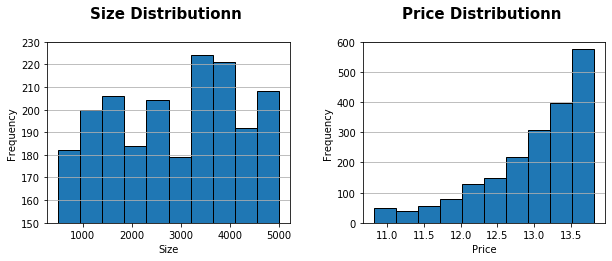

In [7]:
# Analyze distributions of numerical variables (e.g., Size, Price).

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.hist(df['Size'], bins=10 , edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Size')
plt.title('Size Distributionn \n' , fontsize=15 , fontweight='bold')
plt.ylim(150,230)
plt.grid(axis='y')


plt.subplot(2,2,2)
plt.hist(df['Price'], bins=10, edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Price Distributionn \n',fontsize=15, fontweight='bold')
plt.ylim(0,600)
plt.grid(axis='y')

plt.subplots_adjust(wspace=0.3, hspace=0.4) 

plt.show()

In [8]:
# Identify potential outliers that might skew results

# Outliers in Size column
Q1 = df['Size'].quantile(0.25)
Q3 = df['Size'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_in_size = df[(df['Size'] < lower_bound) | (df['Size'] > upper_bound)]

print('Outliers in Size column : ', len(outliers_in_size))


# Outliers in Price column
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_in_price = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

print('Outliers in Price column : ', len(outliers_in_price))

Outliers in Size column :  0
Outliers in Price column :  57


In [9]:
outliers_in_price = pd.DataFrame(outliers_in_price)
print('Number of Outliers : ' , len(outliers_in_price))


Number of Outliers :  57


In [10]:
# Removing outliers
df = df.drop(outliers_in_price.index)
df.shape

(1943, 8)

# 2. Data Preprocessing
  

In [11]:
# Normalize Numerical Data

scaler = RobustScaler()
df[['Size', 'Price']] = scaler.fit_transform(df[['Size', 'Price']])

df

,Size,Rooms,Location,Condition,Price,PropertyAge,PricePerBedroom,PricePerArea
0,-0.657995,5,Downtown,Excellent,-1.450186,55,29983.800000,110.234559
1,0.648127,5,Downtown,Excellent,-0.288031,67,84999.600000,99.484551
2,0.343126,2,Downtown,Good,-0.807535,87,133373.000000,74.261136
3,-0.834716,4,Suburban,Fair,-0.906851,123,61005.000000,252.608696
4,0.941467,1,Downtown,Fair,0.161671,50,636056.000000,129.122209
...,...,...,...,...,...,...,...,...
1995,0.971967,5,Suburban,Poor,-0.692905,102,59124.000000,59.195034
1996,0.098228,5,Suburban,Poor,0.060558,6,116185.800000,190.718647
1997,-0.791657,5,Rural,Poor,-0.159462,122,95385.000000,449.081921
1998,0.553936,3,Urban,Excellent,-1.369829,89,53706.333333,39.664943


In [12]:
# Encode Categorical Features

df['Location'] = LabelEncoder().fit_transform(df['Location'])
df['Condition'] = LabelEncoder().fit_transform(df['Condition'])


# Location = {'Downtown':0, 'Rural':1, 'Suburban':2, 'Urban':3}
# Condition = {'Excellent':0, 'Fair':1, 'Good':2, 'Poor':3}

df

,Size,Rooms,Location,Condition,Price,PropertyAge,PricePerBedroom,PricePerArea
0,-0.657995,5,0,0,-1.450186,55,29983.800000,110.234559
1,0.648127,5,0,0,-0.288031,67,84999.600000,99.484551
2,0.343126,2,0,2,-0.807535,87,133373.000000,74.261136
3,-0.834716,4,2,1,-0.906851,123,61005.000000,252.608696
4,0.941467,1,0,1,0.161671,50,636056.000000,129.122209
...,...,...,...,...,...,...,...,...
1995,0.971967,5,2,3,-0.692905,102,59124.000000,59.195034
1996,0.098228,5,2,3,0.060558,6,116185.800000,190.718647
1997,-0.791657,5,1,3,-0.159462,122,95385.000000,449.081921
1998,0.553936,3,3,0,-1.369829,89,53706.333333,39.664943


# 3. Feature Selection


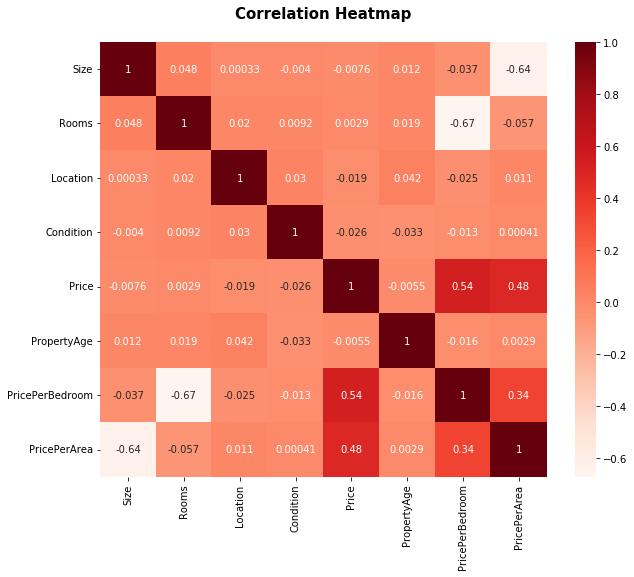

In [13]:
# col = pd.DataFrame(df[['Size', 'Rooms', 'Condition', 'Price']])

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.title('Correlation Heatmap\n', fontweight='bold', fontsize=15)
plt.show()

Analyzing the relationship of Price with every feature based on the correlation matrix :
 
1) Size: very weak positive correlation
    
2) Rooms: very weak negative correlation
    
3) PropertyAge: very weak negative correlation
    
4) Location:very weak negative correlation
    
5) Condition:very weak negative correlation

In [14]:
# Removing features with low correlation to Price

correlation_matrix = df.corr()
correlation_with_price = correlation_matrix['Price'].sort_values(ascending=False)

low_impact_features = correlation_with_price[abs(correlation_with_price) < 0.01].index
df = df.drop(columns=low_impact_features)
df

,Location,Condition,Price,PricePerBedroom,PricePerArea
0,0,0,-1.450186,29983.800000,110.234559
1,0,0,-0.288031,84999.600000,99.484551
2,0,2,-0.807535,133373.000000,74.261136
3,2,1,-0.906851,61005.000000,252.608696
4,0,1,0.161671,636056.000000,129.122209
...,...,...,...,...,...
1995,2,3,-0.692905,59124.000000,59.195034
1996,2,3,0.060558,116185.800000,190.718647
1997,1,3,-0.159462,95385.000000,449.081921
1998,3,0,-1.369829,53706.333333,39.664943


# 4. Model Training

In [15]:
#  Train-Test Split

X = df[['Location', 'Condition', 'PricePerBedroom', 'PricePerArea']]    # Predictor variables
y = df['Price']                                                         # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape[0])
print("Testing Set Size:", X_test.shape[0])

Training Set Size: 1554
Testing Set Size: 389


In [16]:
# Train a Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [-8.29616331e-03 -1.46522320e-02  1.38123728e-06  8.54583128e-04]
Model Intercept: -0.7309284032530481


Observations from Model Coefficients:

- Location
    - Prices decreases as location moves from Downtown > Rural > Suburban > Urban
    - Prices of houses are least in urban location
- Condition
    - Prices decreases as Condition moves from Excellent > Fair > Good > Poor
    - Therefore, as condition of the property worsens, the price decreases.
- PricePerBedroom
    - The extremely small coefficient for 'PricePerBedroom' indicates that this feature has a negligible impact on the
      'Price' in the model.
- PricePerArea
    - The positive coefficient for 'PricePerArea' suggests that, an increase in the 'PricePerArea' is associated with 
      a slight increase in the 'Price'.

# 5. Model Evaluation

In [17]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)


Mean Absolute Error (MAE): 0.44129793710855425
Mean Squared Error (MSE): 0.2974014740135466
R-squared Score: 0.40993127091698467


# 6. Prediction

In [18]:
results_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
results_df.head()

,Actual Price,Predicted Price
1654,-1.719059,-0.644041
1440,0.360914,0.573575
1769,-0.149574,0.057991
1080,0.401522,-0.249072
314,-0.686063,-0.566185


In [19]:
print('Difference between Predicted and Actual prices')
difference = pd.DataFrame(results_df['Predicted Price'].round(0) - results_df['Actual Price'].round(0))
difference.head()

Difference between Predicted and Actual prices


,0
1654,1.0
1440,1.0
1769,0.0
1080,-0.0
314,0.0


# Summary

Dataset Source : https://www.kaggle.com/datasets/zafarali27/house-price-prediction-dataset?resource=download
        
        
1. Load and analyse dataset
    - Check for missing values and handle them appropriately.
    - Analyze distributions of numerical variables (e.g., Size, Price).
    - Identify potential outliers that might skew results.
    
    
    
2. Data Preprocessing
    - Normalize Numerical Data:
        - Robust Scaling uses the median and IQR (Interquartile Range) to scale data, making it robust to outliers.
        - Formula:𝑋′=(𝑋−Median)/IQR
    - Encode Categorical Features:
        - Convert Locationand Condition into numerical values using Label Encoding for ordinal categories.
            
            
            
3. Feature Selection
    - Use correlation analysis to identify relationships between features and the target variable (Price).
    - Consider removing low-impact predictors to improve model performance.
        
        
4. Model Training
    - Train-Test Split
    - Train a Linear Regression Model
    
    
5. Model Evaluation
    - The model exhibits moderate predictive power, as evidenced by the R-squared score of 0.41.
    - The MAE and MSE values suggest that the model's predictions have an average error of around 0.44 units and 0.29 
      squared units, respectively.
      
6. Prediction
    - Difference between Predicted and Actual prices is almost negligible